# Bike Sharing

https://www.kaggle.com/c/bike-sharing-demand/data


__Objective: predict total ridership of Capital Bikeshare in any given hour__

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

### Load in data

In [4]:
bikes = pd.read_csv("./train.csv", index_col='datetime', parse_dates=True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


The rideship `count` prediction will be our response variable. 

In [8]:
# rename count to total
bikes.rename(columns={'count':'total_rentals'}, inplace = True)

### Visualizating the data

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


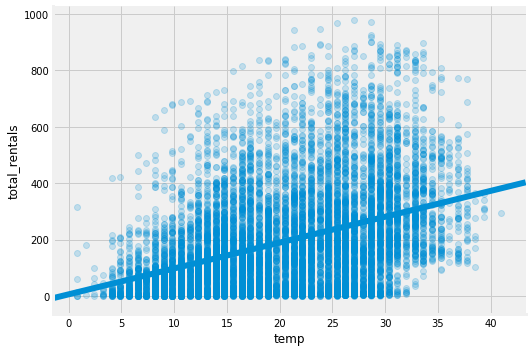

In [13]:
sns.lmplot(x='temp', y='total_rentals', data = bikes, aspect=1.5, scatter_kws={'alpha': 0.2})

## Building Linear REgression Model in Sklearn

WE will create a feature matrix called X that holds a dataframe with only the `temp` variable and a Series called y that has the `total_rentals` columns

In [17]:
# create x and y
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.total_rentals

In [18]:
# Check X's shape (n = number of observations, p = number of features).
print(X.shape)

(10886, 1)


In [19]:
# Check y's shape (single dimension with length n).
# The comma indicates the datatype is a tuple.
print(y.shape)

(10886,)


### Sklearn 4 Step Modeling Pattern

#### Step 1: Import the Class you plan to use

In [20]:
from sklearn.linear_model import LinearRegression

#### Step 2: Instantiate the estimator
- __estimator__ is sklearn term for model
- __instantiate__ means _make an instance_

In [21]:
# make an instance of LinearRegression object
lr = LinearRegression()
type(lr)

sklearn.linear_model.base.LinearRegression

Okay we we just:
- creatd an object that knows how do do linear regression, and it just waiting for data
- name the object does not matter
- all parameters not specified are set to their defaults
- can specify tuning parameters (aka "hypterparameters") during this step

To view the possible parameters, eithe ruse the `?help` that is built-in or evaluate the newl instantied model... as such"

In [22]:
# help(lr)
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Step 3: Fit the model with data (aka "model training)
- model is _learning_ the relationship between X and y in our trainign data
- process through with learning occurs varies by model
- occurs in place

In [23]:
lr.fit(X, y) #train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

- once a model has been fit with data, its called a "fitted model"


In [27]:
print(lr.intercept_)
print(lr.coef_)

6.046212959616781
[9.17054048]


##### Interpreting the Coefficient
Interpreting the intercept ($\beta_0$):
- it is the value of y when all independent variables are 0
- Here, it is the estimated number of tentals when the temperateure is 0 degress C.

Interpreting the `temp` coefficient ($\beta_1$):
- __Interpretation:__ An increase of 1 degres Celcius is _associated_ with increasing the number of total rentals by  ($\beta_1$).
- Here, a temperature increase of 1 degreee Celsius is associated with a rental increase of 9.17 bkikes. 
- This is not a staement of causation
-  ($\beta_1$) would be __negative__ if an increase in temperature was associated with a __decrease__ in totla rentals
-  ($\beta_1$) woudl be __zero__ if temperate is not associated with total rentals. 

#### Step 4. Predict the response variable for a new observation
- New observations are called "out-of-sample" data
- use the information it learned during the model training

In [24]:
lr.predict(np.array([0]).reshape(1, -1))
# reshape to turn this to something like this [[0]]

array([6.04621296])

LEts ask the model to make __2 predictions:__
1. when the `temp` is 0, and;
2. when the `temp` is 10

To do this , our feature matrix is always a 2-D array where each row is a list of features. Since we only have a single feature, `temp`, weach row will contain only a single value

In [25]:
X_new = [[0], [10]] 
lr.predict(X_new)

array([ 6.04621296, 97.75161777])

What we just predicted using the model is, _"If temperature is 0 degrees, the total number of bike rentals wil be ~6.046, and if the `temp` is 10 degrees the total number of bike rentals will be ~97.8"_

In [29]:
# Manual calcuation the prediction
cof =  9.17054048
intercep = 6.04621295962
y = 25* cof + intercep
print (y)

235.30972495961998


In [30]:
# use the prediction mdethod
temp = np.array([[25]])
lr.predict(temp)

array([235.309725])

----
## Working with Multiple Features

In [ ]:
# create feature column variabels
feature_cols = ['temp', 'season', 'weather', 'humidity']